<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Modelo para Plataforma de Delivery
</h1>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> </i> 
</p>  

### Desafio: Desenvolver um Modelo que estime com precisão o tempo total de entrega

> 1. Desenvolver Variáveis Explicativas Úteis em Negócio + Variáveis de Geolocalização + Variáveis de Grafos para Otimização da Rota + Variáveis Temporais

- Criação de Variáveis Conceitualmente boas para o Negócio
- Criação de Variáveis usando Estatística Espacial (Autocorrelações, Distâncias Euclidianas, entre outras coisas)
- Criação de Variáveis usando Grafos para simulação de Rotas (Otimização de Rotas)
- Criação de Variáveis usando Séries Temporais para compreensão de sazonalidades 
- Criação de Variáveis a partir de Métodos Novos que podem trazer ganhos

> 2. Desenvolver um Regressor para inferir o Tempo total de entrega (Order Moment Delivered - Order Moment Created)

- Avaliar quais fatores influenciam no tempo de entrega e identificar gargalos operacionais.
- Melhorar a eficiência logística e definir estratégias para otimizar tempos de entrega.
- Testar LightGBM com funções de custo (MAE, MSE, MSLE, Huber Loss, RMSLE, Gamma...)

# <font color='green'>📦 Projeto: Modelagem do Tempo Total de Entrega</font>
<hr style='border: 2px solid green;'>

## 1️⃣ Análise Exploratória Inicial das Bases

> **Objetivo:** Entender as características das tabelas (Orders, Deliveries, Stores, Drivers, Hubs, Channels, Payments) e como elas se relacionam entre si.

### 1.1) Entendimento das Bases

- Dimensão de cada tabela (linhas x colunas)
- Tipos de variáveis e % de valores nulos
- Identificação das chaves primárias e estrangeiras
- Compreensão do fluxo do processo logístico:
  - Criação do pedido
  - Aceite pela loja
  - Coleta pelo entregador
  - Expedição e entrega

### 1.2) Estatísticas Descritivas Iniciais

- Distribuição de **order_amount**, **delivery_distance_meters**, **store_plan_price**, etc.
- Frequência de pedidos por **canal**, **cidade**, **estado** e **segmento de loja**
- Identificação de **outliers** e **valores inconsistentes**
- Análise de sazonalidade ou concentração temporal (ex: pedidos por hora/dia/mês)

---

## 2️⃣ Definição e Engenharia do Target

> **Target:** Tempo total de entrega = `Order Moment Delivered - Order Moment Created`

### 2.1) Criação do Target


#### $$ {tempo_total_entrega} = \frac{({Order Moment Delivered} - {Order Moment Created})}{60} $$

- Converter timestamps para datetime
- Tratar registros com timestamps nulos ou inconsistentes
- Filtrar casos de entregas canceladas ou não finalizadas

### 2.2) Análise Exploratória do Target

- Distribuição do tempo total de entrega (histograma / boxplot)
- Identificação de outliers e valores extremos
- Análise temporal: comportamento do tempo médio de entrega ao longo dos meses
- Análise por categoria:
  - Por **hub**, **canal**, **tipo de loja**, **tipo de entregador**
  - Por **faixa de distância percorrida**

---

## 3️⃣ Análise das Features em Relação ao Target

### 3.1) Correlações e Relações Diretas

- Correlação de Pearson/Spearman entre features numéricas e o target
- Comparação de tempos médios de entrega por categoria (ex: canal, hub, tipo de entregador)
- Mapas de calor (heatmaps) e gráficos de dispersão

### 3.2) Identificação de Potenciais Variáveis Explicativas

- Variáveis relacionadas à **demanda** (ex: hora do dia, dia da semana, mês)
- Variáveis relacionadas à **logística** (ex: distância, modal do entregador)
- Variáveis relacionadas à **estrutura operacional** (ex: hub, plano da loja)
- Variáveis financeiras (ex: valor do pedido, custo de entrega)

---

## 4️⃣ Feature Engineering Avançada

> **Objetivo:** Criar variáveis preditoras mais ricas usando técnicas de negócio, estatística espacial, grafos e séries temporais.

### 4.1) Variáveis de Negócio

- **Tempo de aceitação:** `Order Moment Accepted - Order Moment Created`
- **Tempo de produção:** `Order Moment Ready - Order Moment Accepted`
- **Tempo de coleta:** `Order Moment Collected - Order Moment Ready`
- **Tempo de trânsito:** `Order Moment Delivered - Order Moment Collected`
- **Margem da entrega:** `order_amount - order_delivery_cost`
- **Taxa sobre o valor do pedido:** `order_delivery_fee / order_amount`
- **Volume de pedidos por loja/hub/hora**

### 4.2) Variáveis de Estatística Espacial

- **Distância Euclidiana** entre loja e hub, hub e cliente, loja e cliente:
  
  #### $$ d = \sqrt{(\Delta {lat})^2 + (\Delta {lon})^2} $$
- **Agrupamento espacial** (ex: lojas próximas tendem a ter tempos semelhantes?)
- **Autocorrelação espacial (Moran’s I)** do tempo médio de entrega por região
- **Densidade de pedidos** por área geográfica (ex: número de entregas em raio de 2 km)

### 4.3) Variáveis de Grafos (Otimização de Rotas)

- Modelar os **Hubs e Lojas** como **nós** e as **entregas** como **arestas**
- Calcular **shortest paths** e **centralidade**:
  - `grau de centralidade` (número de conexões de um hub)
  - `betweenness centrality` (importância logística do hub na malha)
  - **Tempo médio entre nós vizinhos**
- Simular **rotas ótimas** usando algoritmos de grafos (Dijkstra / A*)

### 4.4) Variáveis Temporais

- Mês, dia da semana e hora do pedido
- Dummies para **períodos de pico** (ex: horário de almoço e jantar)
- Média móvel do tempo de entrega por hub (ex: últimas 24h)
- Defasagens temporais (ex: demanda acumulada nas últimas horas)

### 4.5) Outras Ideias Avançadas

- **Clusterização de lojas/hubs** por perfil operacional
- **Análise de variância (ANOVA)** para identificar grupos com tempos distintos
- **Features de interação:** multiplicação entre variáveis correlacionadas
- **Encoding** inteligente de variáveis categóricas (target encoding, frequency encoding)

---

## 5️⃣ Modelagem

> **Objetivo:** Predizer o tempo total de entrega com alta acurácia e interpretabilidade.

### 5.1) Modelos de Regressão Testados

- **LightGBM (principal modelo)**
  - Vantagens: performance, interpretabilidade (importância das features), handling de dados heterogêneos
- Outros modelos de comparação:
  - **XGBoost**
  - **CatBoost**
  - **Random Forest**
  - **Regressões robustas (Huber / Quantile Regression)**

### 5.2) Estratégia de Validação

- Split temporal (ex: treino até mês X, teste nos meses seguintes)
- Avaliação por **K-Fold temporal**
- Ajuste de hiperparâmetros com **Optuna** ou **GridSearchCV**

---

## 6️⃣ Avaliação do Modelo

> **Objetivo:** Analisar o desempenho do modelo e a utilidade prática das previsões.

### 6.1) Métricas de Machine Learning


#### $$ {MAE} = \frac{1}{n} \sum |y_i - \hat{y}_i| $$

#### $$ {RMSE} = \sqrt{\frac{1}{n} \sum (y_i - \hat{y}_i)^2} $$

#### $$ {R}^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2} $$

- MAE → Erro médio absoluto (intuitivo em minutos)
- RMSE → Penaliza erros grandes
- RMSLE → Ideal quando há grande variação entre entregas curtas e longas
- MAPE → Facilita leitura percentual do erro médio

### 6.2) Métricas de Negócio (Visão do Head de Operações)

- **% de entregas acima do SLA (ex: 30 minutos)**
- **Tempo médio por hub / canal / cidade**
- **Variação do tempo de entrega por tipo de entregador**
- **Impacto financeiro do atraso médio (ex: custo adicional por hora extra)**
- **Top 5 hubs / canais com maior contribuição para o atraso global**

### 6.3) Interpretação do Modelo

- **Feature Importance (Gain / Split / SHAP)**
- **Partial Dependence Plots (PDP)** para entender relações não lineares
- **Análise de clusters de erro** (onde o modelo erra mais e por quê)
- **Simulações de cenários** (ex: "e se dobrássemos o número de entregadores no Hub X?")

---

## 7️⃣ Conclusões e Próximos Passos

- Síntese dos principais drivers do tempo de entrega
- Ações operacionais recomendadas (ex: redistribuição de hubs, otimização de turnos)
- Sugestões de aprimoramento:
  - Incluir dados climáticos e de trânsito
  - Modelos de aprendizado online (atualização contínua)
  - Uso de **modelos causais** para inferir o impacto de políticas logísticas

---

> **Resumo:**  
> Este projeto une dados de negócio, estatística espacial, teoria dos grafos e aprendizado de máquina para gerar um modelo de previsão de tempo de entrega com alto valor operacional, capaz de apoiar decisões estratégicas e táticas de eficiência logística.


# <font color='red' style='font-size: 40px;'> Library   </font>
<hr style='border: 2px solid red;'>

In [11]:
## Bibliotecas Gerais 
import sys
sys.executable

## Bibliotecas de Análise de Dados
import pandas as pd 
import geopandas as gpd
import builtins as builtins
import matplotlib.pyplot as plt
import seaborn as sns 
from IPython.display import display, Image
from tabulate import tabulate
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

# Bibliotecas de Manipulação de Tempo
from datetime import datetime, date

## Bibliotecas de Modelagem Matemática e Estatística
import numpy as np
import scipy as sp 
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest, ttest_ind, ttest_rel, mannwhitneyu, wilcoxon, kruskal, uniform, chi2_contingency
from statsmodels.stats.weightstats import ztest
from numpy import interp
import random


# Bibliotecas de Pré-Processamento e Pipeline
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# Bibliotecas de Modelos de Machine Learning
import joblib
from joblib import Parallel, delayed
import pickle
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
import shap

# Bibliotecas de Métricas de Machine Learning
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, accuracy_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, precision_recall_curve, average_precision_score, f1_score, log_loss, brier_score_loss, confusion_matrix, silhouette_score

# Parâmetros de Otimização
import random
import warnings
%matplotlib inline
sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = '14'
plt.rcParams['figure.figsize'] = [10, 5]
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira os números do formato de Notação Científica
np.set_printoptions(suppress=True) # Tira os números do formato de Notação Científica em Numpy Arrays
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning) # Retira Future Warnings
# from pyspark.sql import SparkSession, Row 
# from pyspark.sql.functions import *
# import pyspark.sql.functions as F
 

# # Spark Session
# spark = SparkSession.builder.getOrCreate()

In [54]:
def plota_barras(variaveis, df, titulo, rotation=0, figsize=(8,5), top_n=None):
    if isinstance(variaveis, (list, tuple)):
        if len(variaveis) == 0:
            raise ValueError("lista de variáveis vazia")
        if len(variaveis) > 1:
            for v in variaveis:
                plota_barras(v, df, f"{titulo} — {v}", rotation=rotation, figsize=figsize, top_n=top_n)
            return
        variavel = variaveis[0]
    else:
        variavel = variaveis

    counts = df[variavel].value_counts()
    if top_n is not None:
        counts = counts.head(top_n)

    order = counts.index
    values = counts.values
    total = values.sum()

    ax = sns.barplot(x=order, y=values, color='#1FB3E5')

    ax.set_title(titulo, fontsize=14)
    ax.set_xlabel(variavel, fontsize=12)
    ax.set_ylabel('Quantidade', fontsize=12)

    # Adiciona os percentuais em cima das barras
    for i, v in enumerate(values):
        ax.text(
            i,                     # posição X
            v + (max(values) * 0.01),  # posição Y (1% acima da barra)
            f'{(v/total)*100:.2f}%',  # texto
            ha='center', va='bottom', fontsize=10
        )

    ax.set_ylim(0, max(values) * 1.15)  # mais espaço pro texto
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha='right', fontsize=10)
    ax.set_yticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()], fontsize=10)

    plt.tight_layout()
    plt.show()


def plota_boxplot(df, variavel, target):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target, y=variavel, data=df, palette=['green', 'yellow', 'red'])
    plt.title(f'Boxplot Risco de Fraude para {variavel}', fontsize=12)
    plt.xlabel(target)
    plt.ylabel(variavel)

    # Ajuste da disposição dos gráficos
    plt.tight_layout()
    plt.show()



def plota_grafico_linhas(df, x, y, nao_calcula_media, title):

    if nao_calcula_media:
        # Criando o gráfico de linha
        plt.figure(figsize=(20, 8))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        media = df[y].mean()
        # Criando o gráfico de linha
        plt.figure(figsize=(20, 8))
        plt.plot(df[x], df[y], marker='o', linestyle='-', color='#1FB3E5')

        # Adicionando linha da média
        plt.axhline(y=media, color='r', linestyle='--', linewidth=1, label=f'Média: {media:.2f}')
        plt.legend()

        # Adicionando títulos e rótulos aos eixos
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)

        for i, txt in enumerate(df[y]):
            plt.annotate(f'{txt:.1f}', (df[x][i], df[y][i]), textcoords="offset points", xytext=(0,1), ha='center')

        # Exibindo o gráfico
        plt.grid(True)
        plt.xticks(rotation=90)
        plt.ylim(0, 50)
        plt.tight_layout()
        plt.show()

def plot_fraude(df, group_col, figsize=(18,4), cmap="RdYlGn_r"):
    # Agrupamento e cálculo
    df_group = (
        df.groupby(group_col, as_index=False)
          .agg({'transacao':'count', 'risk_transaction':'sum'})
          .rename(columns={'transacao':'qtd', 'risk_transaction':'fraude'})
    )
    df_group['%fraude'] = df_group['fraude'] / df_group['qtd'] * 100

    # Gráfico
    plt.figure(figsize=figsize)
    sns.barplot(
        data=df_group,
        x=group_col,
        y='%fraude',
        palette=cmap  # Use o nome da paleta diretamente
    )
    plt.title(f'% Fraude por {group_col.capitalize()}', fontsize=16)
    plt.xlabel(group_col.capitalize(), fontsize=12)
    plt.ylabel('% Fraude', fontsize=12)

    # Inserindo rótulos nos valores
    for index, row in df_group.iterrows():
        plt.text(
            index, 
            row['%fraude'] + 0.2, 
            f"{row['%fraude']:.1f}", 
            ha='center', 
            va='bottom', 
            fontsize=10, 
            color='black'
        )

    plt.tight_layout()
    plt.show()
    
    return df_group

# <font color='orange' style='font-size: 40px;'> 1. Leitura do Dataset </font>
<hr style='border: 2px solid orange;'>

https://www.kaggle.com/datasets/nosbielcs/brazilian-delivery-center?resource=download

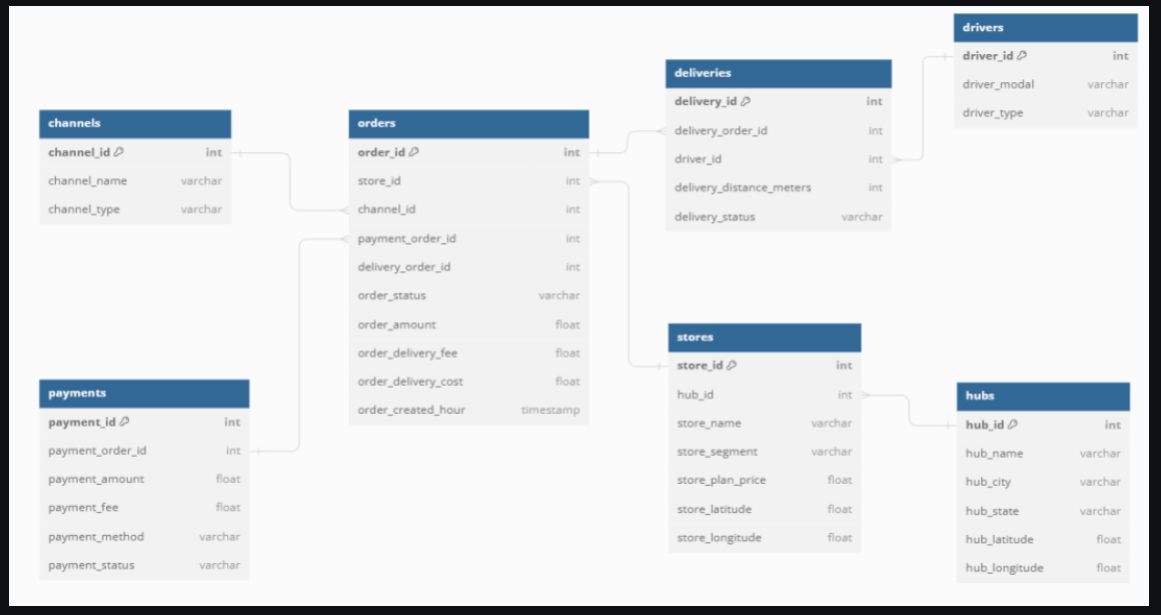

## 1.1.1) Channels

> 1. Este dataset possui informações sobre os canais de venda (marketplaces) onde são vendidos os good e food de nossos lojistas.

- **Channel ID:** Identificador único do canal de vendas.
- **Channel Name:** Nome do canal de vendas.
- **Channel Type:** Tipo de canal de vendas.

## 1.1.2) Deliveries

> 1. Este dataset possui informações sobre as entregas realizadas por nossos entregadores parceiros.

- **Delivery Id:** Identificador único da entrega.
- **Delivery Order ID:** Identificador único do pedido.
- **Driver Id:** Identificador do entregador responsável pela entrega.
- **Delivery Distance Meters:** Distância total percorrida para a entrega, em metros.
- **Delivery Status:** Status atual da entrega.

## 1.1.3) Drivers

> 1. Este dataset possui informações sobre os entregadores parceiros. Eles ficam em nossos hubs e toda vez que um pedido é processado, são eles fazem as entregas na casa dos consumidores.

- **Driver Id:** Identificador único do entregador.
- **Driver Modal:** Modalidade de transporte utilizada pelo entregador.
- **Driver Type:** Tipo de entregador.

## 1.1.4) Hubs

> 1. Este dataset possui informações sobre os hubs do Delivery Center. Entenda que os Hubs são os centros de distribuição dos pedidos e é dali que saem as entregas.

- **Hub ID:** Identificador único do hub.
- **Hub Name:** Nome do hub.
- **Hub City:** Cidade onde o hub está localizado.
- **Hub State:** Estado onde o hub está localizado.
- **Hub Latitude:** Latitude da localização do hub.
- **Hub Longitude:** Longitude da localização do hub.

## 1.1.5) Orders

> 1. Este dataset possui informações sobre as vendas processadas através da plataforma do Delivery Center.

- **Delivery Order ID:** Identificador único do pedido.
- **Store ID:** Identificador da loja que recebeu o pedido.
- **Channel ID:** Identificador do canal pelo qual o pedido foi realizado.
- **Order Status:** Status atual do pedido.
- **Order Amount:** Valor total do pedido.
- **Order Delivery Fee:** Taxa de entrega cobrada ao cliente.
- **Order Delivery Cost:** Custo da entrega para a plataforma ou loja.
- **Order Created Hour:** Hora em que o pedido foi criado.
- **Order Created Minute:** Minuto em que o pedido foi criado.
- **Order Created Day:** Dia em que o pedido foi criado.
- **Order Created Month:** Mês em que o pedido foi criado.
- **Order Created Year:** Ano em que o pedido foi criado.
- **Order Moment Created:** Momento exato em que o pedido foi criado.
- **Order Moment Accepted:** Momento em que o pedido foi aceito pela loja.
- **Order Moment Ready:** Momento em que o pedido ficou pronto para entrega.
- **Order Moment Collected:** Momento em que o pedido foi coletado pelo entregador.
- **Order Moment In Expedition:** Momento em que o pedido entrou em expedição.
- **Order Moment Delivering:** Momento em que o pedido está sendo entregue.
- **Order Moment Delivered:** Momento em que o pedido foi entregue ao cliente.
- **Order Moment Finished:** Momento em que o pedido foi finalizado no sistema.

## 1.1.6) Payments

> 1. Este dataset possui informações sobre os pagamentos realizados ao Delivery Center.

- **Payment ID:** Identificador único do pagamento.
- **Delivery Order ID:** Identificador único do pedido.
- **Payment Amount:** Valor total pago pelo cliente.
- **Payment Fee:** Taxa de processamento do pagamento.
- **Payment Method:** Método de pagamento utilizado pelo cliente.
- **Payment Status:** Status atual do pagamento.

## 1.1.7) Stores

> 1. Este dataset possui informações sobre os lojistas. Eles utilizam a Plataforma do Delivery Center para vender seus itens (good e/ou food) nos marketplaces.

- **Store ID:** Identificador único da loja.
- **Hub ID:** Identificador do hub ao qual a loja está associada.
- **Store Name:** Nome da loja.
- **Store Segment:** Segmento ou categoria da loja.
- **Store Plan Price:** Preço do plano de assinatura da loja na plataforma.
- **Store Latitude:** Latitude da localização da loja.
- **Store Longitude:** Longitude da localização da loja.


In [50]:
df_orders = (
    pd.read_csv('../Modelo_Delivery/data/orders.csv')
    .drop(['order_id', 'payment_order_id'], axis = 1)
    .rename(
        {
            'delivery_order_id':'delivery_order_id',
            'channel_id':'channel_id',
            'store_id':'store_id',
        },
        axis = 1
    )
)
df_channels = pd.read_csv('../Modelo_Delivery/data/channels.csv')
df_deliveries = pd.read_csv('../Modelo_Delivery/data/deliveries.csv')
df_drivers = pd.read_csv('../Modelo_Delivery/data/drivers.csv')
df_hubs = pd.read_csv('../Modelo_Delivery/data/hubs.csv', encoding='latin-1')
df_payments = pd.read_csv('../Modelo_Delivery/data/payments.csv').rename({'payment_order_id':'delivery_order_id'}, axis=1)
df_stores = pd.read_csv('../Modelo_Delivery/data/stores.csv', encoding='latin-1')

In [57]:
colunas_renomeadas = {
    # ------------------- ORDERS -------------------
    'store_id': 'id_loja',
    'channel_id': 'id_canal',
    'delivery_order_id': 'id_pedido_entrega',
    'order_status': 'status_pedido',
    'order_amount': 'valor_pedido',
    'order_delivery_fee': 'taxa_entrega_cliente',
    'order_delivery_cost': 'custo_entrega_plataforma',
    'order_created_hour': 'hora_criacao_pedido',
    'order_created_minute': 'minuto_criacao_pedido',
    'order_created_day': 'dia_criacao_pedido',
    'order_created_month': 'mes_criacao_pedido',
    'order_created_year': 'ano_criacao_pedido',
    'order_moment_created': 'momento_criacao_pedido',
    'order_moment_accepted': 'momento_aceite_pedido',
    'order_moment_ready': 'momento_pedido_pronto',
    'order_moment_collected': 'momento_pedido_coletado',
    'order_moment_in_expedition': 'momento_pedido_expedicao',
    'order_moment_delivering': 'momento_pedido_em_entrega',
    'order_moment_delivered': 'momento_pedido_entregue',
    'order_moment_finished': 'momento_pedido_finalizado',

    # Métricas de tempo do pedido
    'order_metric_collected_time': 'tempo_coleta_pedido',
    'order_metric_paused_time': 'tempo_pedido_pausado',
    'order_metric_production_time': 'tempo_producao_pedido',
    'order_metric_walking_time': 'tempo_deslocamento_pedido',
    'order_metric_expediton_speed_time': 'tempo_expedicao_pedido',
    'order_metric_transit_time': 'tempo_transito_pedido',
    'order_metric_cycle_time': 'tempo_ciclo_pedido',

    # ------------------- CHANNELS -------------------
    'channel_name': 'nome_canal',
    'channel_type': 'tipo_canal',

    # ------------------- PAYMENTS -------------------
    'payment_id': 'id_pagamento',
    'payment_amount': 'valor_pagamento',
    'payment_fee': 'taxa_pagamento',
    'payment_method': 'metodo_pagamento',
    'payment_status': 'status_pagamento',

    # ------------------- DELIVERIES -------------------
    'delivery_id': 'id_entrega',
    'driver_id': 'id_entregador',
    'delivery_distance_meters': 'distancia_entrega_metros',
    'delivery_status': 'status_entrega',

    # ------------------- STORES -------------------
    'store_name': 'nome_loja',
    'store_segment': 'segmento_loja',
    'store_plan_price': 'preco_plano_loja',
    'store_latitude': 'latitude_loja',
    'store_longitude': 'longitude_loja',

    # ------------------- DRIVERS -------------------
    'driver_modal': 'modal_entregador',
    'driver_type': 'tipo_entregador',

    # ------------------- HUBS -------------------
    'hub_id': 'id_hub',
    'hub_name': 'nome_hub',
    'hub_city': 'cidade_hub',
    'hub_state': 'estado_hub',
    'hub_latitude': 'latitude_hub',
    'hub_longitude': 'longitude_hub',
}


df_full = (
    df_orders
    .merge(df_channels, on='channel_id', how='left') # Merge OK
    .merge(df_payments, on='delivery_order_id', how='left') # Merge Ok
    .merge(df_deliveries, on='delivery_order_id', how='left')
    .merge(df_stores, on='store_id', how='left')
    .merge(df_drivers, on='driver_id', how='left')
    .merge(df_hubs, on='hub_id', how='left')
)

df_full.rename(columns=colunas_renomeadas, inplace=True)

display(df_full.shape)
df_full.head()

(442239, 51)

,id_loja,id_canal,id_pedido_entrega,status_pedido,valor_pedido,taxa_entrega_cliente,custo_entrega_plataforma,hora_criacao_pedido,minuto_criacao_pedido,dia_criacao_pedido,mes_criacao_pedido,ano_criacao_pedido,momento_criacao_pedido,momento_aceite_pedido,momento_pedido_pronto,momento_pedido_coletado,momento_pedido_expedicao,momento_pedido_em_entrega,momento_pedido_entregue,momento_pedido_finalizado,tempo_coleta_pedido,tempo_pedido_pausado,tempo_producao_pedido,tempo_deslocamento_pedido,tempo_expedicao_pedido,tempo_transito_pedido,tempo_ciclo_pedido,nome_canal,tipo_canal,id_pagamento,valor_pagamento,taxa_pagamento,metodo_pagamento,status_pagamento,id_entrega,id_entregador,distancia_entrega_metros,status_entrega,id_hub,nome_loja,segmento_loja,preco_plano_loja,latitude_loja,longitude_loja,modal_entregador,tipo_entregador,nome_hub,cidade_hub,estado_hub,latitude_hub,longitude_hub
0,3512,5,68405119,CANCELED,62.70,0.00,NaN,0,1,1,1,2021,1/1/2021 12:01:36 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29
1,3512,5,68405123,CANCELED,62.70,0.00,NaN,0,4,1,1,2021,1/1/2021 12:04:26 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29
2,3512,5,68405206,CANCELED,115.50,0.00,NaN,0,13,1,1,2021,1/1/2021 12:13:07 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75,GOI SIPIMUSU,FOOD,49.00,-25.48,-49.29,NaN,NaN,PYTHON SHOPPING,CURITIBA,PR,-25.48,-49.29
3,3401,5,68405465,CANCELED,55.90,0.00,NaN,0,19,1,1,2021,1/1/2021 12:19:15 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28
4,3401,5,68406064,CANCELED,37.90,0.00,NaN,0,26,1,1,2021,1/1/2021 12:26:25 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FOOD PLACE,MARKETPLACE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,FRUEOU,FOOD,49.90,-25.44,-49.28,NaN,NaN,HOTMILK SHOPPING,CURITIBA,PR,-25.44,-49.28


In [ ]:
plota_barras(['delivery_status'], df_deliveries, 'Distribuição Status Entrega', rotation=0)
plota_boxplot(df_deliveries, 'delivery_distance_meters', 'delivery_status')

# <font color='green' style='font-size: 30px;'> 1.1) Análise Nulos </font>
<hr style='border: 2px solid green;'>



Existem 51 variáveis no Dataset
Existem 22 variáveis sem registros nulos no Dataset


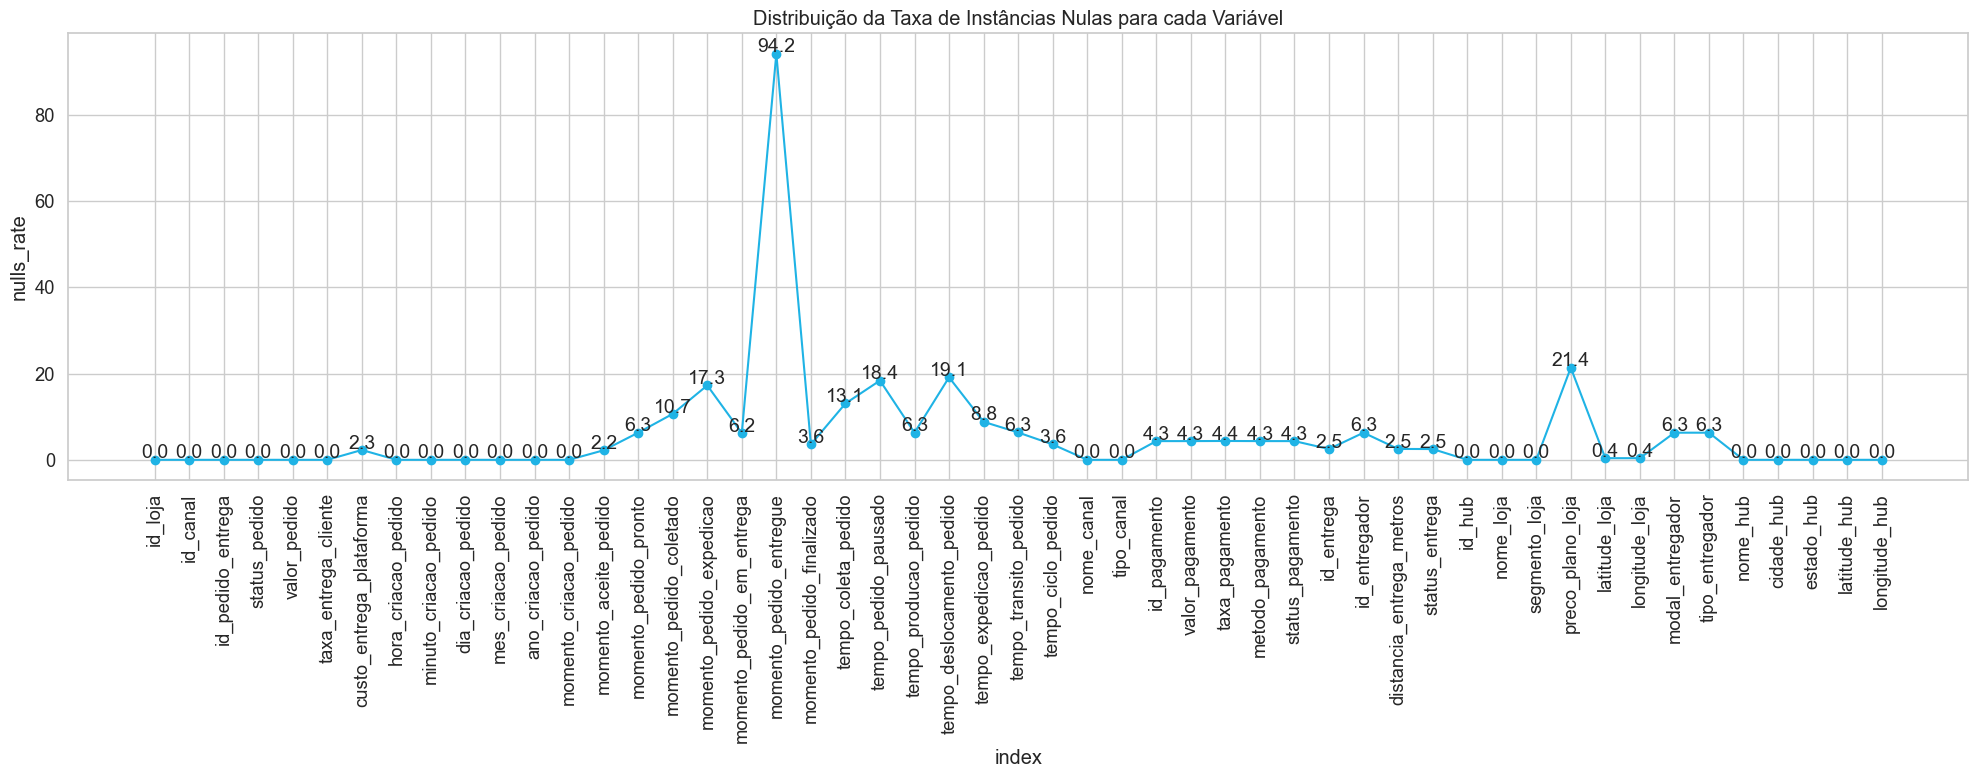

In [59]:
df_nulls = (
    pd.DataFrame(
        df_full
        .isnull().sum()
      )
      .reset_index()
      .rename({0:'nulls_amnt'}, axis = 1)
)
df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_full.shape[0])*100, 2)

print(f'Existem {len(df_nulls)} variáveis no Dataset')
df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
columns_not_nulls = list(df_not_nulls_nulls['index'])
print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

# <font color='Orange' style='font-size: 40px;'> 2. Análise da Target </font>
<hr style='border: 2px solid Orange;'>

# <font color='green' style='font-size: 30px;'> 2.1) Target </font>
<hr style='border: 2px solid green;'>

> 1. 

In [11]:
# # Distribuição de Risk Rank
# plota_barras(['risk_rank'], df_metaverse, 'Distribuição Fraudes', rotation=0)


# # Risk Score vs Risk Rank
# plot_histogram_and_boxplot(df_metaverse, 'risk_score', 'risk_rank')

# # Risk Client Vs Safra
# risk_client_por_safra = df_metaverse[["id_enviador", "safra", "risk_client"]].groupby("safra").agg({"risk_client":"sum", "id_enviador":"count"}).reset_index()
# risk_client_por_safra["%risk_client_por_safra"] = round(risk_client_por_safra["risk_client"]/risk_client_por_safra["id_enviador"]*100, 2)
# plota_grafico_linhas(risk_client_por_safra, "safra", "%risk_client_por_safra", False, "Distribuição de Risk Clients (Moderate Risk + High Risk) ao longo das Safras")

# <font color='green' style='font-size: 30px;'> 2.2) Separação de Amostras para Treino, Teste e OOT </font>
<hr style='border: 2px solid green;'>


# <font color='Orange' style='font-size: 40px;'> 3. Análise Exploratória - Foco em Relações com a Target</font>
<hr style='border: 2px solid Orange;'>

# <font color='green' style='font-size: 30px;'> 3.1) Tipo de Dados </font>
<hr style='border: 2px solid green;'>

In [12]:
# df_metaverse.dtypes

# <font color='green' style='font-size: 30px;'> 3.2) Nulos </font>
<hr style='border: 2px solid green;'>

In [13]:
# df_nulls = (
#     pd.DataFrame(
#         df_metaverse
#         # .drop(["msno", "safra", "churn"] + variaveis_desconsideradas, axis = 1)
#         .isnull().sum()
#       )
#       .reset_index()
#       .rename({0:'nulls_amnt'}, axis = 1)
# )
# df_nulls['nulls_rate'] = round((df_nulls['nulls_amnt']/df_metaverse.shape[0])*100, 2)

# print(f'Existem {len(df_nulls)} variáveis no Dataset')
# df_not_nulls_nulls = df_nulls.loc[df_nulls['nulls_rate'] == 0]
# columns_not_nulls = list(df_not_nulls_nulls['index'])
# print(f'Existem {len(columns_not_nulls)} variáveis sem registros nulos no Dataset')

# plota_grafico_linhas(df_nulls, "index", "nulls_rate", True, "Distribuição da Taxa de Instâncias Nulas para cada Variável")

# <font color='green' style='font-size: 30px;'> 3.3) Variáveis </font>
<hr style='border: 2px solid green;'>

In [14]:
# # Função para formatar os números
# def format_number(n):
#     if n >= 1_000_000:
#         return f'{n / 1_000_000:.1f}MM'  # Para milhões (ex: 50.0MM)
#     elif n >= 1_000:
#         return f'{n / 1_000:.1f}K'  # Para milhares (ex: 50.0K)
#     else:
#         return str(n)  # Para valores menores que 1.000

# # Carregando o mapa do Brasil com Geopandas
# url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
# gdf = gpd.read_file(url)

# # Unindo os dados de casos com os dados de geolocalização dos estados
# gdf = gdf.set_index('sigla').join(df_cases_states_cross_section.set_index('state'))

# # Plotando o mapa
# fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# # Plotando o mapa com cores que variam de verde (menos casos) a vermelho (mais casos)
# gdf.plot(column='cases', ax=ax, legend=True,
#          legend_kwds={'label': "Total de Casos por Estado",
#                       'orientation': "horizontal"},
#          cmap='RdYlGn_r', edgecolor='black')

# # Adicionando o número de casos em cada estado
# for idx, row in gdf.iterrows():
#     # Obtendo o centroide de cada estado
#     x, y = row.geometry.centroid.x, row.geometry.centroid.y
    
#     # Formatando o número de casos
#     formatted_cases = format_number(row['cases'])
    
#     # Adicionando o número de casos no centroide do estado
#     ax.annotate(f'{formatted_cases}', xy=(x, y), xytext=(3, 3), textcoords="offset points",
#                 fontsize=10, color='black', ha='center')

#     # Adicionando a sigla do estado no centroide
#     ax.annotate(f'{row.name}', xy=(x, y), xytext=(0, 10), textcoords="offset points",
#                 fontsize=12, color='black', ha='center')

# # Adicionando o título
# ax.set_title("Distribuição de Casos por Estado - Brasil", fontsize=16)

# # Exibindo o mapa
# plt.tight_layout()
# plt.show()

# # Carregando o mapa do Brasil com Geopandas
# url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
# gdf = gpd.read_file(url)

# # Unindo os dados de taxas com os dados de geolocalização dos estados
# gdf = gdf.set_index('sigla').join(df_cases_states_cross_section.set_index('state'))

# # Plotando o mapa
# fig, ax = plt.subplots(1, 1, figsize=(20, 15))

# # Plotando o mapa com cores que variam de verde (menor taxa) a vermelho (maior taxa)
# gdf.plot(column='tax_deaths_per_cases', ax=ax, legend=True,
#          legend_kwds={'label': "Taxa de Mortes por Casos (%)",
#                       'orientation': "horizontal"},
#          cmap='RdYlGn_r', edgecolor='black')

# # Adicionando a taxa de mortes por caso em cada estado
# for idx, row in gdf.iterrows():
#     # Obtendo o centroide de cada estado
#     x, y = row.geometry.centroid.x, row.geometry.centroid.y
    
#     # Formatando a taxa de mortes
#     formatted_rate = f'{row["tax_deaths_per_cases"]:.2f}%'
    
#     # Adicionando a taxa de mortes no centroide do estado
#     ax.annotate(f'{formatted_rate}', xy=(x, y), xytext=(3, 3), textcoords="offset points",
#                 fontsize=10, color='black', ha='center')

#     # Adicionando a sigla do estado no centroide
#     ax.annotate(f'{row.name}', xy=(x, y), xytext=(0, 10), textcoords="offset points",
#                 fontsize=12, color='black', ha='center')

# # Adicionando o título
# ax.set_title("Taxa de Mortes por Casos - Brasil", fontsize=16)

# # Exibindo o mapa
# plt.tight_layout()
# plt.show()